# Assignment 4: K-Mean Clustering

## 1. Dataset Upload

In [1]:
# import dataset
# from google.colab import files
# uploaded = files.upload()

In [2]:
# to chack the datasets are correctly uploaded and labeled.
import os
print(os.listdir(os.getcwd()))

['.config', '4.jpg', 'sample_data']


##2. Import Libraries

In [3]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np 

##3. Data Cleaning and Storing

(598, 676, 3)
598 676 3


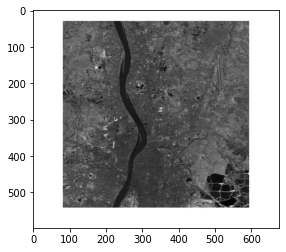

In [4]:
# investigate one input image
img = plt.imread('4.jpg')
plt.imshow(img)
a, b, c = img.shape
print(img.shape)
print(a, b, c)
# we have to delete this white border while taking input

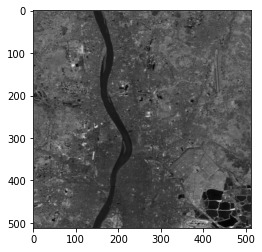

In [5]:
# zoom image to find the cliffed coordinate 
# of image of 512*512
img1  = img[28:540, 80:592]
plt.imshow(img1)

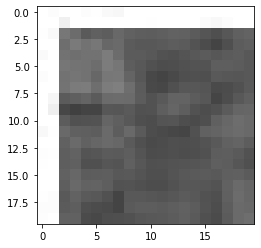

In [6]:
# magnify to see if white border
# cliffed correctly at edge
plt.imshow(img1[0:20, 0:20])

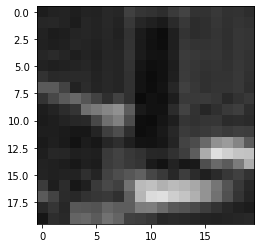

In [7]:
plt.imshow(img1[492:512, 492:512])

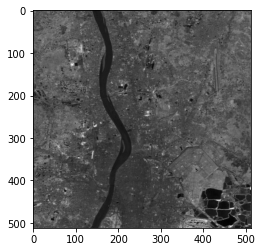

In [8]:
ig = plt.imread('4.jpg')[30:542, 82:594]
X = np.array(ig[:, :, 0])
plt.imshow(X, cmap='gray')

##4. K-Mean Cluster

###4.1 Step1: Random Initialization of Centroids

In [9]:
# initializing diiferent k number of centroids
def centroid_init(k, X):
  # k: number of cluster
  # X: Input feature vectore
  # return: centroid of shape 1*k
  centroid = np.random.choice(X.flatten(), size=(k,), replace=False)
  return centroid

In [10]:
# check of above method
print(centroid_init(7, X))

[104 100  87 101  54  65 102]


###4.2 Step2: Method for Euclidean Distance Calculation

In [11]:
def euclidean_dist(a, b):
  # a: linear vector
  # b: linear vector
  # return: euclidean distance between them
  return np.sqrt(np.sum(np.power((a-b), 2)))

In [12]:
# check of above method
print(euclidean_dist(5, 4))

1.0


###4.3 Close Match Calculation
Assign each object to the cluster with the nearest center point. Compute the centers of the clusters of the current partition (i.e., Mean, of the cluster). 

In [13]:
# method defines the close match of particular point
# and also return updated centroid of each cluster along with cluster
def close_match(centroid, val):
  # centroid: list of centroid for each cluster
  # val: scalar value of that pixel
  # X: input feature vector
  minDist = np.finfo('float').max # initialize with max value
  minClass = -1 # default closest match initialized

  
  for i in range(len(centroid)):
    dist = euclidean_dist(centroid[i], val)
    if dist < minDist:
      minDist = dist
      minClass = i

  return minClass

###4.4 Main Method Call for K-Mean Clustering

In [14]:
def kmeans(k, X):
  # k: k number of clusters
  # X: Input feature vector
  centroid = centroid_init(k, X)
  sum = np.array([0]*k) # sum of element of each cluster
  elements = np.array([0]*k) # number of elements of each cluster
  prev_label = np.zeros(shape=(512, 512), dtype=np.int8) # initialize class label for each pixel
  curr_label = prev_label[:, :].copy()
  # run once to cluster them correctly into k groups
  for _ in range(X.shape[0]):
    for a in range(X.shape[1]):
      val = X[_, a]
      closeClass = close_match(centroid, val)
      curr_label[_, a] = closeClass
      sum[closeClass] += val
      elements[closeClass] += 1

  prev_label = curr_label[:, :].copy() # update previous label
  print(elements)
  centroid = np.floor_divide(sum, elements) # update new centroid

  # run till no change of clusterings
  f = False # flag veriable
  while not f:
    for _ in range(X.shape[0]):
      for a in range(X.shape[1]):
        val = X[_, a]
        closeClass = close_match(centroid, val)
        prevClass = curr_label[_, a]
        # remove from prevClass
        sum[prevClass] -= val
        elements[prevClass] -= 1
        # add to new Class
        sum[closeClass] += val
        elements[closeClass] += 1
    f = np.array_equal(prev_label, curr_label)
    prev_label = curr_label[:, :].copy()
    print(elements)
    centroid = np.floor_divide(sum, elements)

  # return: image with segmentation
  return curr_label

In [15]:
# a = np.array([10, 20, 30])
# b = np.array([5, 2, 3])
# print(a.shape)
# c = np.floor_divide(a, b)
# print(c.shape)
# a[0] = 20
# print(c)

(3,)
(3,)
[ 2 10 10]


###4.5: Example-1, For K = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


[ 50887 211257]
[127769 134375]


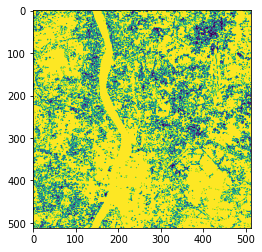

In [16]:
# for k = 2
y = kmeans(2, X)
plt.imshow(y)

###4.6: Example-3, For K = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


[124721  45693  12614  79116]
[106855  59836  36062  59391]


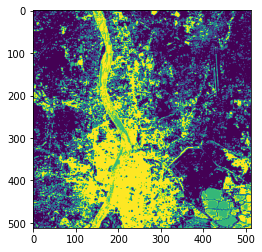

In [18]:
# for k = 4
y = kmeans(4, X)
plt.imshow(y)

###4.7 Example3: for K = 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


[  4432  84291   4407  64450 104564]
[ 32316 102629  24708  70745  31746]


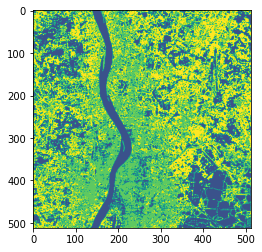

In [19]:
# for k = 5
y = kmeans(5, X)
plt.imshow(y)